In [12]:
import openturns as ot
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from shapley import SobolIndices, SobolKrigingIndices, create_df_from_gp_indices, create_df_from_mc_indices
from shapley.tests import ishigami, ishigami_true_indices
from shapley.plots import set_style_paper, plot_violin, matrix_plot

import time

%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


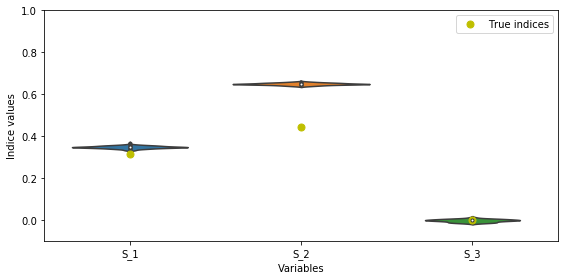

In [169]:
dim = 3
model = ishigami
margins = [ot.Uniform(-np.pi, np.pi)]*dim
theta_1 = 0.
theta_2 = 0.99
theta_3 = 0.
sigma = np.identity(dim)
sigma[1, 0] = theta_1
sigma[0, 1] = theta_1
sigma[2, 0] = theta_2
sigma[0, 2] = theta_2
sigma[2, 1] = theta_3
sigma[1, 2] = theta_3
    
copula = ot.NormalCopula(ot.CorrelationMatrix(sigma))
input_distribution = ot.ComposedDistribution(margins, copula)
ot.RandomGenerator.SetSeed(0)

sample = np.asarray(input_distribution.getSample(1000))
if False:
    sample = np.asarray(input_distribution.getSample(1000))
    dist_transformation = input_distribution.getIsoProbabilisticTransformation()
    transformed_sample = np.asarray(dist_transformation(sample))
    matrix_plot(sample, kde=True, figsize=2)
    matrix_plot(transformed_sample, kde=True, figsize=2)
    
max_budget = 200000
n_sample = int(max_budget/(2*dim))
n_boot = 100
ylim = [-0.1, 1.]

sobol = SobolIndices(input_distribution)
sobol.build_uncorrelated_mc_sample(model, n_sample)
sobol.build_mc_sample(model, n_sample)
first_indices_mc = sobol.compute_indices(n_boot=n_boot)
df_first_indices_mc = create_df_from_mc_indices(first_indices_mc)
plot_violin(df_first_indices_mc, with_hue=False, true_indices=ishigami_true_indices, ylim=ylim)